# Brazilian E-Commerce
### Data Understanding

In [98]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import seaborn as sns
import warnings

In [99]:
warnings.filterwarnings('ignore')

In [2]:
# Import data for dataframe via path
path = r'/Users/abrockk12.wv.us/Documents/Career Foundry/Brazilian E_Commerce'
path

'/Users/abrockk12.wv.us/Documents/Career Foundry/Brazilian E_Commerce'

In [3]:
customers = pd.read_csv(os.path.join(path, 'olist_customers_dataset.csv'))

In [4]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
customers.shape

(99441, 5)

In [6]:
customers.rename(columns = {'customer_zip_code_prefix':'zip_code_prefix'}, inplace = True)

In [7]:
cust_dup = customers[customers.duplicated()]
cust_dup

,customer_id,customer_unique_id,zip_code_prefix,customer_city,customer_state


In [8]:
customers.isnull().sum()

customer_id           0
customer_unique_id    0
zip_code_prefix       0
customer_city         0
customer_state        0
dtype: int64

In [9]:
location = pd.read_csv(os.path.join(path, 'olist_geolocation_dataset.csv'))

In [10]:
location.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [11]:
location.shape

(1000163, 5)

In [12]:
locate_dups = location[location.duplicated()]
locate_dups

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


In [13]:
location = location.drop_duplicates()

In [14]:
location.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [15]:
location.rename(columns={'geolocation_zip_code_prefix':'zip_code_prefix'}, inplace = True)

In [16]:
location2 = location
location2

,zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000155,99965,-28.180655,-52.034367,agua santa,RS
1000156,99950,-28.072188,-52.011272,tapejara,RS
1000157,99950,-28.068864,-52.012964,tapejara,RS
1000158,99950,-28.068639,-52.010705,tapejara,RS


In [17]:
location2 = location.drop(columns = ['geolocation_lat', 'geolocation_lng'])
location2

,zip_code_prefix,geolocation_city,geolocation_state
0,1037,sao paulo,SP
1,1046,sao paulo,SP
2,1046,sao paulo,SP
3,1041,sao paulo,SP
4,1035,sao paulo,SP
...,...,...,...
1000155,99965,agua santa,RS
1000156,99950,tapejara,RS
1000157,99950,tapejara,RS
1000158,99950,tapejara,RS


In [18]:
location_clean = location2.drop_duplicates()
location_clean

,zip_code_prefix,geolocation_city,geolocation_state
0,1037,sao paulo,SP
1,1046,sao paulo,SP
3,1041,sao paulo,SP
4,1035,sao paulo,SP
5,1012,são paulo,SP
...,...,...,...
999806,99940,ibiaçá,RS
999846,99952,santa cecilia do sul,RS
999867,99970,ciríaco,RS
999891,99930,estação,RS


In [19]:
order_items = pd.read_csv(os.path.join(path, 'olist_order_items_dataset.csv'))

In [20]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [21]:
# missing values
order_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [22]:
# Check for duplicates
order_items_dups = order_items[order_items.duplicated('order_id')]
order_items_dups

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
43,001ab0a7578dd66cd4b0a71f5b6e1e41,2,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
44,001ab0a7578dd66cd4b0a71f5b6e1e41,3,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
...,...,...,...,...,...,...,...
112617,ffecd5a79a0084f6a592288c67e3c298,3,50fd2b788dc166edd20512370dac54df,8b321bb669392f5163d04c59e235e066,2018-03-05 20:15:27,21.90,15.79
112635,fff8287bbae429a99bb7e8c21d151c41,2,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22,180.00,48.14
112641,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
112642,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19


In [23]:
order_items.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

In [24]:
order_items.shape

(112650, 7)

In [25]:
order_payments = pd.read_csv(os.path.join(path, 'olist_order_payments_dataset.csv'))

In [26]:
order_payments.nunique()

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

In [27]:
order_payments.shape

(103886, 5)

In [28]:
order_payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [29]:
order_payments_dups = order_payments[order_payments.duplicated('order_id')]
order_payments_dups

,order_id,payment_sequential,payment_type,payment_installments,payment_value
1456,683bf306149bb869980b68d48a1bd6ab,1,credit_card,1,8.58
2324,e6a66a8350bb88497954d37688ab123e,2,voucher,1,10.51
2393,8e5148bee82a7e42c5f9ba76161dc51a,1,credit_card,1,0.67
2414,816ccd9d21435796e8ffa9802b2a782f,1,credit_card,1,5.65
2497,2cbcb371aee438c59b722a21d83597e0,2,voucher,1,7.80
...,...,...,...,...,...
103778,fd86c80924b4be8fb7f58c4ecc680dae,1,credit_card,1,76.10
103817,6d4616de4341417e17978fe57aec1c46,1,credit_card,1,19.18
103860,31bc09fdbd701a7a4f9b55b5955b8687,6,voucher,1,77.99
103869,c9b01bef18eb84888f0fd071b8413b38,1,credit_card,6,238.16


In [30]:
order_reviews = pd.read_csv(os.path.join(path, 'olist_order_reviews_dataset.csv'))

In [31]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [32]:
order_reviews.shape

(99224, 7)

In [33]:
order_reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [34]:
review_dups = order_reviews[order_reviews.duplicated()]
review_dups

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp


In [35]:
order_reviews.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [36]:
orders = pd.read_csv(os.path.join(path, 'olist_orders_dataset.csv'))

In [37]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [38]:
orders.shape

(99441, 8)

In [39]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [40]:
order_dups = orders[orders.duplicated()]
order_dups

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [41]:
check_total = orders[orders['order_id'] == '001ab0a7578dd66cd4b0a71f5b6e1e41']
check_total

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
26976,001ab0a7578dd66cd4b0a71f5b6e1e41,8bb3bef4e75a95524235cdc11a7331af,delivered,2017-12-27 00:38:47,2017-12-28 02:33:42,2017-12-28 18:09:35,2018-01-17 20:43:29,2018-01-29 00:00:00


In [42]:
products = pd.read_csv(os.path.join(path, 'olist_products_dataset.csv'))

In [43]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [44]:
products.shape

(32951, 9)

In [45]:
products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [46]:
products.dropna(subset = ['product_category_name'], inplace = True)

In [47]:
products.rename(columns = {'product_name_lenght':'product_name_length','product_description_lenght': 'product_description_length' }, inplace = True)

In [48]:
products_dups = products[products.duplicated()]
products_dups

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm


In [49]:
sellers = pd.read_csv(os.path.join(path, 'olist_sellers_dataset.csv'))

In [50]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [51]:
sellers.shape

(3095, 4)

In [52]:
sellers.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [53]:
seller_dups = sellers[sellers.duplicated()]
seller_dups

,seller_id,seller_zip_code_prefix,seller_city,seller_state


In [54]:
product_category = pd.read_csv(os.path.join(path, 'product_category_name_translation.csv'))

In [55]:
product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [56]:
product_category.shape

(71, 2)

In [57]:
product_category.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [58]:
product_dups = product_category[product_category.duplicated()]
product_dups

,product_category_name,product_category_name_english


In [59]:
closed_deals = pd.read_csv(os.path.join(path, 'olist_closed_deals_dataset.csv'))

In [60]:
closed_deals.head()

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0


In [61]:
closed_deals.shape

(842, 14)

In [62]:
closed_deals.isnull().sum()

mql_id                             0
seller_id                          0
sdr_id                             0
sr_id                              0
won_date                           0
business_segment                   1
lead_type                          6
lead_behaviour_profile           177
has_company                      779
has_gtin                         778
average_stock                    776
business_type                     10
declared_product_catalog_size    773
declared_monthly_revenue           0
dtype: int64

In [63]:
closed_dups = closed_deals[closed_deals.duplicated()]
closed_dups

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue


In [64]:
marketing_qualified_leads = pd.read_csv(os.path.join(path, 'olist_marketing_qualified_leads_dataset.csv'))

In [65]:
marketing_qualified_leads.head()

,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search


In [66]:
marketing_qualified_leads.shape

(8000, 4)

In [67]:
marketing_qualified_leads.isnull().sum()

mql_id                 0
first_contact_date     0
landing_page_id        0
origin                60
dtype: int64

In [68]:
market_dups = marketing_qualified_leads[marketing_qualified_leads.duplicated()]
market_dups

,mql_id,first_contact_date,landing_page_id,origin


### Merge All Tables Into One

In [69]:
# Merge order_items and order_payments on order_id
df = order_items.merge(order_payments, how = 'left', indicator = False)

In [70]:
df.shape

(117604, 11)

In [71]:
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,218.04


In [72]:
df_dups = df[df.duplicated(['order_id'])]
df_dups

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37,1.0,boleto,1.0,126.54
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10,1.0,credit_card,1.0,109.29
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10,1.0,credit_card,1.0,109.29
39,0016dfedd97fc2950e388d2971d718c7,1,4089861a1bd4685da70bddd6b4f974f1,a35124e2d763d7ca3fbe3b97d143200f,2017-05-05 10:05:12,49.75,20.80,1.0,credit_card,5.0,52.63
44,001ab0a7578dd66cd4b0a71f5b6e1e41,2,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63,1.0,boleto,1.0,127.56
...,...,...,...,...,...,...,...,...,...,...,...
117571,ffecd5a79a0084f6a592288c67e3c298,3,50fd2b788dc166edd20512370dac54df,8b321bb669392f5163d04c59e235e066,2018-03-05 20:15:27,21.90,15.79,1.0,credit_card,1.0,113.07
117589,fff8287bbae429a99bb7e8c21d151c41,2,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22,180.00,48.14,1.0,credit_card,4.0,456.28
117595,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19,1.0,boleto,1.0,356.76
117596,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19,1.0,boleto,1.0,356.76


In [73]:
df_2 = df.merge(order_reviews, how = 'left')
df_2

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,72.19,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,259.83,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,216.87,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,25.78,f4028d019cb58564807486a6aaf33817,4.0,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,218.04,940144190dcba6351888cafa43f3a3a5,5.0,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118305,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,1.0,boleto,1.0,343.40,9185f849f32d82e216a4e025e0c50f5c,5.0,NaN,NaN,2018-05-11 00:00:00,2018-05-14 12:53:47
118306,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,1.0,boleto,1.0,386.53,be803f6a93d64719fd685c1cc610918a,5.0,NaN,NaN,2018-07-24 00:00:00,2018-07-25 09:25:29
118307,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,1.0,credit_card,3.0,116.85,dbdd81cd59a1a9f94a10a990b4d48dce,5.0,NaN,NaN,2017-10-29 00:00:00,2017-10-29 21:33:52
118308,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,1.0,credit_card,3.0,64.71,fba117c9ac40d41ca7be54741f471303,5.0,NaN,Recebi o produto antes do prazo e corretamente.,2017-08-17 00:00:00,2017-08-18 12:24:05


In [74]:
df_dups2 = df_2[df_2.duplicated(['order_id'])]
df_dups

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37,1.0,boleto,1.0,126.54
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10,1.0,credit_card,1.0,109.29
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10,1.0,credit_card,1.0,109.29
39,0016dfedd97fc2950e388d2971d718c7,1,4089861a1bd4685da70bddd6b4f974f1,a35124e2d763d7ca3fbe3b97d143200f,2017-05-05 10:05:12,49.75,20.80,1.0,credit_card,5.0,52.63
44,001ab0a7578dd66cd4b0a71f5b6e1e41,2,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63,1.0,boleto,1.0,127.56
...,...,...,...,...,...,...,...,...,...,...,...
117571,ffecd5a79a0084f6a592288c67e3c298,3,50fd2b788dc166edd20512370dac54df,8b321bb669392f5163d04c59e235e066,2018-03-05 20:15:27,21.90,15.79,1.0,credit_card,1.0,113.07
117589,fff8287bbae429a99bb7e8c21d151c41,2,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22,180.00,48.14,1.0,credit_card,4.0,456.28
117595,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19,1.0,boleto,1.0,356.76
117596,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19,1.0,boleto,1.0,356.76


In [75]:
df_3 = df_2.merge(orders, how = 'left')
df_3

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,...,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,...,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,...,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,...,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,...,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118305,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,1.0,boleto,1.0,...,NaN,2018-05-11 00:00:00,2018-05-14 12:53:47,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18 00:00:00
118306,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,1.0,boleto,1.0,...,NaN,2018-07-24 00:00:00,2018-07-25 09:25:29,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01 00:00:00
118307,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,1.0,credit_card,3.0,...,NaN,2017-10-29 00:00:00,2017-10-29 21:33:52,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10 00:00:00
118308,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,1.0,credit_card,3.0,...,Recebi o produto antes do prazo e corretamente.,2017-08-17 00:00:00,2017-08-18 12:24:05,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25 00:00:00


In [76]:
df_4 = df_3.merge(products, how = 'left')
df_4

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,order_delivered_customer_date,order_estimated_delivery_date,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,...,2017-09-20 23:43:48,2017-09-29 00:00:00,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,...,2017-05-12 16:04:24,2017-05-15 00:00:00,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,...,2018-01-22 13:19:16,2018-02-05 00:00:00,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,...,2018-08-14 13:32:39,2018-08-20 00:00:00,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,...,2017-03-01 16:42:31,2017-03-17 00:00:00,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118305,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,1.0,boleto,1.0,...,2018-05-10 22:56:40,2018-05-18 00:00:00,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
118306,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,1.0,boleto,1.0,...,2018-07-23 20:31:55,2018-08-01 00:00:00,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0
118307,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,1.0,credit_card,3.0,...,2017-10-28 12:22:22,2017-11-10 00:00:00,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0
118308,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,1.0,credit_card,3.0,...,2017-08-16 21:59:40,2017-08-25 00:00:00,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0


In [77]:
df_5 = df_4.merge(sellers, how = 'left')
df_5

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,...,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,...,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,...,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,...,42.0,480.0,1.0,200.0,16.0,10.0,15.0,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,...,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,87900,loanda,PR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118305,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,1.0,boleto,1.0,...,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,88303,itajai,SC
118306,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,1.0,boleto,1.0,...,31.0,232.0,1.0,8950.0,45.0,26.0,38.0,1206,sao paulo,SP
118307,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,1.0,credit_card,3.0,...,43.0,869.0,1.0,967.0,21.0,24.0,19.0,80610,curitiba,PR
118308,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,1.0,credit_card,3.0,...,56.0,1306.0,1.0,100.0,20.0,20.0,20.0,4733,sao paulo,SP


In [78]:
df_6 = df_5.merge(customers, how = 'left')
df_6

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,...,28.0,9.0,14.0,27277,volta redonda,SP,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,...,50.0,30.0,40.0,3471,sao paulo,SP,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,...,33.0,13.0,33.0,37564,borda da mata,MG,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,...,16.0,10.0,15.0,14403,franca,SP,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,...,35.0,40.0,30.0,87900,loanda,PR,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118305,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,1.0,boleto,1.0,...,89.0,15.0,40.0,88303,itajai,SC,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA
118306,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,1.0,boleto,1.0,...,45.0,26.0,38.0,1206,sao paulo,SP,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR
118307,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,1.0,credit_card,3.0,...,21.0,24.0,19.0,80610,curitiba,PR,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP
118308,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,1.0,credit_card,3.0,...,20.0,20.0,20.0,4733,sao paulo,SP,eb803377c9315b564bdedad672039306,13289,vinhedo,SP


In [79]:
df_7 = df_6.merge(product_category, how = 'left')
df_7

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,zip_code_prefix,customer_city,customer_state,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,...,9.0,14.0,27277,volta redonda,SP,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,...,30.0,40.0,3471,sao paulo,SP,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,...,13.0,33.0,37564,borda da mata,MG,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,...,10.0,15.0,14403,franca,SP,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,...,40.0,30.0,87900,loanda,PR,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,garden_tools
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118305,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,1.0,boleto,1.0,...,15.0,40.0,88303,itajai,SC,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA,housewares
118306,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,1.0,boleto,1.0,...,26.0,38.0,1206,sao paulo,SP,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR,computers_accessories
118307,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,1.0,credit_card,3.0,...,24.0,19.0,80610,curitiba,PR,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP,sports_leisure
118308,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,1.0,credit_card,3.0,...,20.0,20.0,4733,sao paulo,SP,eb803377c9315b564bdedad672039306,13289,vinhedo,SP,computers_accessories


In [80]:
df_8 = df_7.merge(closed_deals, how = 'left')
df_8

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118305,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,1.0,boleto,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118306,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,1.0,boleto,1.0,...,2018-03-28 18:50:57,computers,online_small,cat,NaN,NaN,NaN,reseller,NaN,0.0
118307,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,1.0,credit_card,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118308,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,1.0,credit_card,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
df_9 = df_8.merge(marketing_qualified_leads, how = 'left')
df_9

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,first_contact_date,landing_page_id,origin
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118305,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,1.0,boleto,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118306,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,1.0,boleto,1.0,...,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-03-19,ce1a65abd0973638f1c887a6efcfa82d,paid_search
118307,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,1.0,credit_card,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118308,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,1.0,credit_card,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
df_10 = df_9.merge(location_clean, how = 'left')
df_10

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,first_contact_date,landing_page_id,origin,geolocation_city,geolocation_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,santa fe do sul,SP
2,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,santa fé do sul,SP
3,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pará de minas,MG
4,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,para de minas,MG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177470,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,1.0,boleto,1.0,...,NaN,NaN,reseller,NaN,0.0,2018-03-19,ce1a65abd0973638f1c887a6efcfa82d,paid_search,curitiba,PR
177471,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,1.0,credit_card,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sao paulo,SP
177472,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,1.0,credit_card,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,são paulo,SP
177473,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,1.0,credit_card,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,vinhedo,SP


In [83]:
df_10.isnull().sum()

order_id                              0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
payment_sequential                    6
payment_type                          6
payment_installments                  6
payment_value                         6
review_id                          1469
review_score                       1469
review_comment_title             156583
review_comment_message           103434
review_creation_date               1469
review_answer_timestamp            1469
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    24
order_delivered_carrier_date       1919
order_delivered_customer_date      3856
order_estimated_delivery_date         0
product_category_name              2579


In [84]:
df_10_dups = df_10[df_10.duplicated()]
df_10_dups

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,first_contact_date,landing_page_id,origin,geolocation_city,geolocation_state


In [85]:
df_10_dups2 = df_10[df_10.duplicated(subset=['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'customer_id', 'customer_unique_id'])]
df_10_dups2

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,first_contact_date,landing_page_id,origin,geolocation_city,geolocation_state
2,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,santa fé do sul,SP
4,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,para de minas,MG
20,000aed2e25dbad2f9ddb70584c5a2ded,1,4fa33915031a8cde03dd0d3e8fb27f01,fe2032dab1a61af8794248c8196565c9,2018-05-16 20:57:03,144.00,8.77,1.0,credit_card,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,santa barbara d oeste,SP
21,000aed2e25dbad2f9ddb70584c5a2ded,1,4fa33915031a8cde03dd0d3e8fb27f01,fe2032dab1a61af8794248c8196565c9,2018-05-16 20:57:03,144.00,8.77,1.0,credit_card,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,santa bárbara d'oeste,SP
23,000c3e6612759851cc3cbb4b83257986,1,b50c950aba0dcead2c48032a690ce817,218d46b86c1881d022bce9c68a7d4b15,2017-08-21 03:33:13,99.00,13.71,1.0,boleto,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,jundiaí,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177455,fff8287bbae429a99bb7e8c21d151c41,1,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22,180.00,48.14,1.0,credit_card,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,joão pessoa,PB
177457,fff8287bbae429a99bb7e8c21d151c41,2,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22,180.00,48.14,1.0,credit_card,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,joão pessoa,PB
177459,fff90cdcb3b2e6cfb397d05d562fd3fe,1,764292b2b0f73f77a0272be03fdd45f3,bd23da7354813347129d751591d1a6e2,2017-11-30 10:11:28,89.90,11.83,1.0,credit_card,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sao paulo,SP
177469,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,1.0,boleto,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,são luís,MA


In [86]:
clean = df_10.drop_duplicates(subset=['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'customer_id', 'customer_unique_id'])
clean

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,first_contact_date,landing_page_id,origin,geolocation_city,geolocation_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,santa fe do sul,SP
3,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pará de minas,MG
5,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,atibaia,SP
6,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,varzea paulista,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177468,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,1.0,boleto,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sao luis,MA
177470,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,1.0,boleto,1.0,...,NaN,NaN,reseller,NaN,0.0,2018-03-19,ce1a65abd0973638f1c887a6efcfa82d,paid_search,curitiba,PR
177471,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,1.0,credit_card,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sao paulo,SP
177473,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,1.0,credit_card,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,vinhedo,SP


In [87]:
clean.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'review_id',
       'review_score', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'product_category_name',
       'product_name_length', 'product_description_length',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'customer_unique_id', 'zip_code_prefix',
       'customer_city', 'customer_state', 'product_category_name_english',
       'mql_id', 'sdr_id', 'sr_id', 'won_date', 'business_segment',
 

In [155]:
# Check for mixed variable types
for col in clean.columns.tolist():
    weird = (clean[[col]].applymap(type) != clean[[col]].iloc[0].apply(type)).any(axis = 1)
    if len (clean[weird]) > 0:
        print (col)

review_creation_date
review_answer_timestamp
order_approved_at
order_delivered_carrier_date
order_delivered_customer_date
first_contact_date


In [145]:
clean = clean.drop(columns = ['won_date', 'has_company', 'has_gtin', 'average_stock'])

In [150]:
clean['landing_page_id'].value_counts()

landing_page_id
nan                                 107606
b76ef37428e6799c421989521c0e5077      1331
22c29808c4f815213303f8933030604c      1149
40dec9f3d5259a3d2dbcdab2114fae47       452
ce1a65abd0973638f1c887a6efcfa82d       357
                                     ...  
21a104c3279681d9856b8a48723c4fee         1
df99f969c517db441d373ae68b2955c9         1
27cd3540bace1f4a4b2bc6d319b0553c         1
3e3371f8470ce094c7c82c09b7bd59d9         1
1e884e3078d9978e216a027ecd57fb34         1
Name: count, Length: 76, dtype: int64

In [102]:
clean['business_type'] = clean['business_type'].astype(str)

In [103]:
clean['product_category_name_english'] = clean['product_category_name_english'].astype(str)

In [104]:
clean['mql_id'] = clean['mql_id'].astype(str)

In [105]:
clean['sr_id'] = clean['sr_id'].astype(str)

In [107]:
clean['business_segment'] = clean['business_segment'].astype(str)

In [109]:
clean['lead_type'] = clean['lead_type'].astype(str)

In [110]:
clean['lead_behaviour_profile'] = clean['lead_behaviour_profile'].astype(str)

In [115]:
clean['payment_type'] = clean['payment_type'].astype(str)

In [117]:
clean['review_id'] = clean['review_id'].astype(str)

In [118]:
clean['review_comment_title'] = clean['review_comment_title'].astype(str)

In [119]:
clean['review_comment_message'] = clean['review_comment_message'].astype(str)

In [120]:
clean['review_creation_date'] = pd.to_datetime(clean['review_creation_date'])

In [122]:
clean['review_answer_timestamp'] = pd.to_datetime(clean['review_answer_timestamp'])

In [124]:
clean['order_approved_at'] = pd.to_datetime(clean['order_approved_at'])

In [125]:
clean['order_delivered_carrier_date'] = pd.to_datetime(clean['order_delivered_carrier_date'])

In [126]:
clean['product_category_name'] = clean['product_category_name'].astype(str)

In [127]:
clean['order_delivered_customer_date'] = pd.to_datetime(clean['order_delivered_customer_date'])

In [128]:
clean['sdr_id'] = clean['sdr_id'].astype(str)

In [147]:
clean['first_contact_date'] = pd.to_datetime(clean['first_contact_date'])

In [149]:
clean['landing_page_id'] = clean['landing_page_id'].astype(str)

In [151]:
clean['origin'] = clean['origin'].astype(str)

In [153]:
clean['geolocation_city'] = clean['geolocation_city'].astype(str)

In [154]:
clean['geolocation_state'] = clean['geolocation_state'].astype(str)

In [133]:
ecommerce = clean.drop(columns = ['order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date','product_name_length', 'product_description_length',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm','mql_id', 'sdr_id', 'sr_id', 'won_date', 'business_segment', 'has_company'])
ecommerce

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,first_contact_date,landing_page_id,origin,geolocation_city,geolocation_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,...,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,...,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,santa fe do sul,SP
3,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,...,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,pará de minas,MG
5,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,...,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,atibaia,SP
6,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,...,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,varzea paulista,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177468,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,1.0,boleto,1.0,...,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,sao luis,MA
177470,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,1.0,boleto,1.0,...,NaN,NaN,reseller,NaN,0.0,2018-03-19,ce1a65abd0973638f1c887a6efcfa82d,paid_search,curitiba,PR
177471,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,1.0,credit_card,3.0,...,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,sao paulo,SP
177473,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,1.0,credit_card,3.0,...,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,vinhedo,SP


### Descriptive Statistics On Clean and Merged Data

In [89]:
ecommerce.describe()

,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,seller_zip_code_prefix,zip_code_prefix,declared_product_catalog_size,declared_monthly_revenue
count,112650.000000,112650.000000,112650.000000,112647.000000,112647.000000,112647.000000,111708.000000,112650.000000,112650.000000,0.0,5044.0
mean,1.197834,120.653739,19.990320,1.022646,3.003205,177.552766,4.033516,24439.170431,35119.309090,NaN,0.0
std,0.705124,183.633928,15.806405,0.255772,2.796766,270.878508,1.387084,27596.030909,29866.120801,NaN,0.0
min,1.000000,0.850000,0.000000,1.000000,0.000000,0.010000,1.000000,1001.000000,1003.000000,NaN,0.0
25%,1.000000,39.900000,13.080000,1.000000,1.000000,64.075000,4.000000,6429.000000,11310.000000,NaN,0.0
50%,1.000000,74.990000,16.260000,1.000000,2.000000,112.580000,5.000000,13568.000000,24340.000000,NaN,0.0
75%,1.000000,134.900000,21.150000,1.000000,4.000000,193.460000,5.000000,27930.000000,59028.750000,NaN,0.0
max,21.000000,6735.000000,409.680000,27.000000,24.000000,13664.080000,5.000000,99730.000000,99990.000000,NaN,0.0


In [90]:
# statistics
price_stats = orders.merge(order_payments, how = 'left')
price_stats

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,3.0,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...
103882,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,1.0,credit_card,3.0,85.08
103883,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1.0,credit_card,3.0,195.00
103884,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1.0,credit_card,5.0,271.01
103885,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1.0,credit_card,4.0,441.16


In [91]:
grouped = price_stats.groupby('order_id')

In [92]:
total_price = grouped['payment_value'].sum()
total_price

order_id
00010242fe8c5a6d1ba2dd792cb16214     72.19
00018f77f2f0320c557190d7a144bdd3    259.83
000229ec398224ef6ca0657da4fc703e    216.87
00024acbcdf0a6daa1e931b038114c75     25.78
00042b26cf59d7ce69dfabb4e55b4fd9    218.04
                                     ...  
fffc94f6ce00a00581880bf54a75a037    343.40
fffcd46ef2263f404302a634eb57f7eb    386.53
fffce4705a9662cd70adb13d4a31832d    116.85
fffe18544ffabc95dfada21779c9644f     64.71
fffe41c64501cc87c801fd61db3f6244     55.79
Name: payment_value, Length: 99441, dtype: float64

In [93]:
total_price.describe()

count    99441.000000
mean       160.988648
std        221.950728
min          0.000000
25%         62.010000
50%        105.290000
75%        176.970000
max      13664.080000
Name: payment_value, dtype: float64

In [94]:
group2 = price_stats.groupby('payment_type')
payment_groups = group2['payment_value'].sum()
payment_groups

payment_type
boleto          2869361.27
credit_card    12542084.19
debit_card       217989.79
not_defined           0.00
voucher          379436.87
Name: payment_value, dtype: float64

In [95]:
payment_type_agg = ecommerce.groupby('payment_type', as_index = False).agg({'payment_value':'sum'})
payment_type_agg

,payment_type,payment_value
0,boleto,4059699.60
1,credit_card,15441319.66
2,debit_card,253463.86
3,voucher,246303.35


/Users/abrockk12.wv.us/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abrockk12.wv.us/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abrockk12.wv.us/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


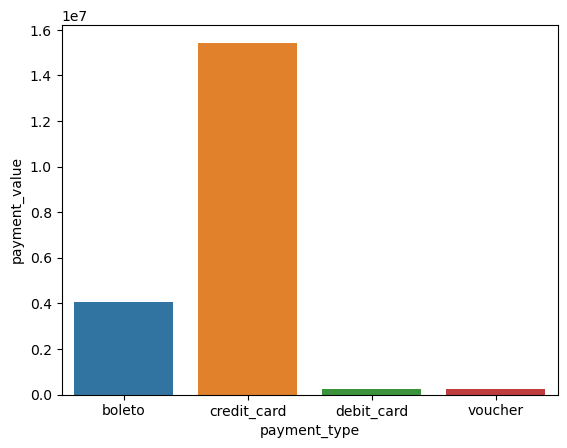

In [96]:
payment_groups_bar = sns.barplot(data = payment_type_agg, x = 'payment_type', y = 'payment_value')

In [156]:
# Export Data
clean.to_pickle(os.path.join(path, 'e_commerce_clean.pkl'))